In [1]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

In [4]:
# 훈련데이터와 테스트 데이터의 벡터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# 라벨 데이터를 카테고리 데이터로 전환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
# 모델 구성

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 90ms/step - loss: 2.7126 - accuracy: 0.5083 - val_loss: 1.8356 - val_accuracy: 0.6180
Epoch 2/20
16/16 [==============================] - 1s 65ms/step - loss: 1.5534 - accuracy: 0.6738 - val_loss: 1.3813 - val_accuracy: 0.6790
Epoch 3/20
16/16 [==============================] - 2s 101ms/step - loss: 1.1883 - accuracy: 0.7394 - val_loss: 1.1866 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 2s 96ms/step - loss: 0.9656 - accuracy: 0.7863 - val_loss: 1.0773 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 1s 60ms/step - loss: 0.7974 - accuracy: 0.8269 - val_loss: 1.0085 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 1s 63ms/step - loss: 0.6672 - accuracy: 0.8515 - val_loss: 0.9568 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.5556 - accuracy: 0.8817 - val_loss: 0.9598 - val_accuracy: 0.7860
Epoch 8/20
1

In [11]:
import matplotlib.pyplot as plt

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

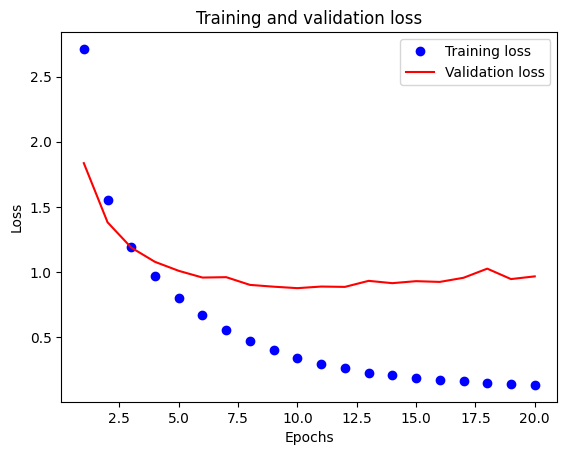

In [14]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

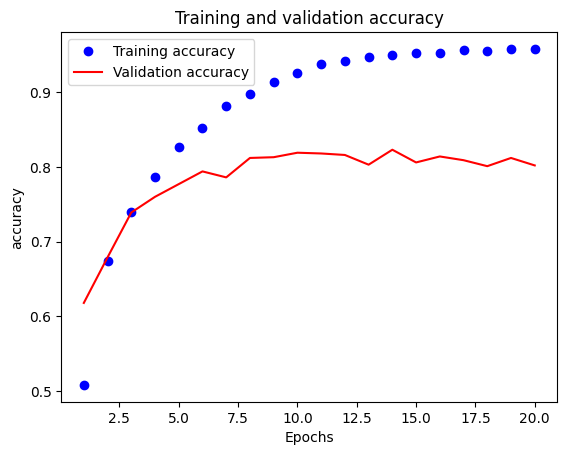

In [15]:
# acc = 정확도를 의미함.

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

In [16]:
# 검증 된 결과로 다시 학습

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# 데이터는 서로 겹치지 않는게 좋다.
eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)


# 로스 값 [0.9662253260612488]
# 정확도 [0.777827262878418]

Epoch 1/10
16/16 [==============================] - 3s 90ms/step - loss: 2.6838 - accuracy: 0.4374 - val_loss: 1.8180 - val_accuracy: 0.6190
Epoch 2/10
16/16 [==============================] - 1s 68ms/step - loss: 1.5507 - accuracy: 0.6792 - val_loss: 1.3915 - val_accuracy: 0.6860
Epoch 3/10
16/16 [==============================] - 1s 59ms/step - loss: 1.1823 - accuracy: 0.7403 - val_loss: 1.1933 - val_accuracy: 0.7360
Epoch 4/10
16/16 [==============================] - 1s 89ms/step - loss: 0.9582 - accuracy: 0.7925 - val_loss: 1.1073 - val_accuracy: 0.7620
Epoch 5/10
16/16 [==============================] - 2s 102ms/step - loss: 0.7882 - accuracy: 0.8301 - val_loss: 1.0044 - val_accuracy: 0.7860
Epoch 6/10
16/16 [==============================] - 1s 66ms/step - loss: 0.6597 - accuracy: 0.8573 - val_loss: 0.9562 - val_accuracy: 0.7890
Epoch 7/10
16/16 [==============================] - 1s 57ms/step - loss: 0.5521 - accuracy: 0.8814 - val_loss: 0.9113 - val_accuracy: 0.8000
Epoch 8/10
1